In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

Busses arriving

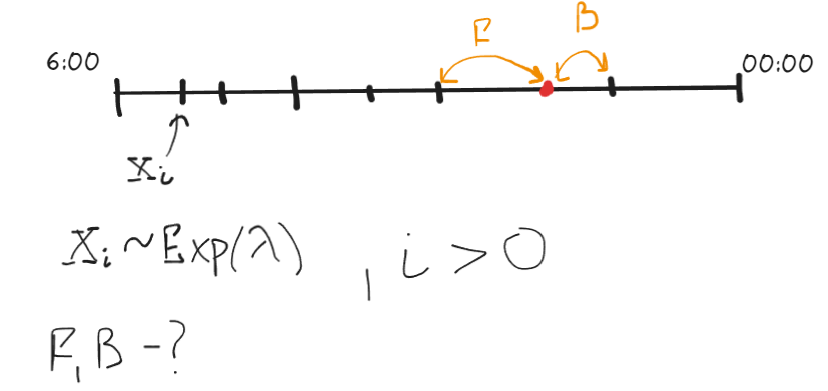

In [147]:
avgt = 7
n = 1000

# Generator of time between two busses
f = lambda x, t: - np.log(1 - x) / t

avgB, avgF = [], []

for _ in range(n):
    x = random.randint(0, 1110) # time of the beginning of waiting
    s = 0
    while s < x:
        rand = f(random.random(), 1 / avgt)
        s += rand
    B = x - s + rand
    F = s - x
    
    avgB.append(B)
    avgF.append(F)

print(sum(avgB) / n, sum(avgF) / n)

6.921641954819307 7.3142735350686285


---

# Problem 2

Simulated annealing approach to solve problem about predict for the match

$(x_0, x_1, ..., x_m)$ - predict for a match, where $x_i=0,1,2$

$((x_{00}, ..., x_{0m}), ..., (x_{n0}, ..., x_{nm}))$ - series of predictions

Ans also let's take a acceptance parameter as $ p = e^{-\frac{predicts_1 - predicts_2}{T}} $

The task: find the minimum n that will cover all the possible cases with one mistake.

_upd: mistake is one wrong bet in predict_ 

In [2]:
def possible_predicts(beg_predicts: set[tuple]) -> set[tuple]:
    '''
    Finds all possible predicts with one mistake  
    with beg_predicts beginnings set of predicts
    '''

    predicts = set()
    for p in beg_predicts:
        temp = set()
        temp.add(tuple(p))
        for i, m in enumerate(p):
            temp.add(tuple([p[j] for j in range(i)] + [abs(2 - m)] + [p[j] for j in range(i + 1, len(p))]))
            temp.add(tuple([p[j] for j in range(i)] + [abs(1 - m)] + [p[j] for j in range(i + 1, len(p))]))
            temp.add(tuple([p[j] for j in range(i)] + [abs(0 - m)] + [p[j] for j in range(i + 1, len(p))]))
        predicts.update(temp)

    return predicts

In [47]:
def min_predicts(games: int, t=2, ht=0.01, nrestriction=10) -> tuple[list[tuple[float, int, int]], int]:
    '''
    Find minimum of predicts of games to do one or less mistakes.
        games: int, number of games

        t: int, T varies in [0, t)

        ht: float, step of T varying

        nrestriction: int, top bound of number of predicts 
                    ! Variable is exist due its possible time complexity of the problem !

        return: list[tuple[float, int, int]]; [T, iterations till exit, length of final predicts], minimum predicts
    '''
    mp = 3**games
    h = int(10**(-np.log10(ht)))
    for n in range(1, nrestriction):
        ismin = False
        beg_predicts = set()
        while len(beg_predicts) < n:
            # generating beginning predicts
            beg_predicts.add(tuple(random.randint(0, 2) for _ in range(games)))

        predicts1 = possible_predicts(beg_predicts)
        predicts2 = possible_predicts((tuple(random.choice(list(predicts1))) for _ in range(n)))

        results = []
        for T in range(t * h, 0, -1):
            T = T / h
            iters = 0
            while random.random() < np.e**(-(len(predicts1) - len(predicts2)) / T) or len(predicts1) < len(predicts2):
                predicts1 = predicts2
                predicts2 = possible_predicts([list(random.choice(list(predicts1))) for _ in range(n)])
                iters += 1    

            ismin = len(predicts1) == mp
            if len(predicts1) == mp:
                results.append((T, iters, len(predicts1)))
        if ismin:
            return results, n
    
    return None

8

In [51]:
m = 10e30
n = 3
for i in range(3000):
    m = min(m, min_predicts(n, nrestriction=200)[1])
print(f"For {n} games:\t{m} ")

For 3 games:	6 


The code bellow shows that code above doesn't work properly (not completely true, it gives only upper bound)

In [57]:
import itertools

In [73]:
for p1 in itertools.product((0, 1, 2), repeat=3):
    for p2 in itertools.product((0, 1, 2), repeat=3):
        for p3 in itertools.product((0, 1, 2), repeat=3):
            for p4 in itertools.product((0, 1, 2), repeat=3):
                for p5 in itertools.product((0, 1, 2), repeat=3):
                    #print(len(possible_predicts({(1, 1, 1), (0, 0, 0), (2, 2, 2), p1, p2})))
                    if len(possible_predicts({p1, p2, p3, p4, p5})) == 27:
                        print(p1, p2, p3, p4, p5)

(0, 0, 0) (1, 1, 2) (1, 2, 1) (2, 1, 1) (2, 2, 2)
(0, 0, 0) (1, 1, 2) (1, 2, 1) (2, 2, 2) (2, 1, 1)
(0, 0, 0) (1, 1, 2) (2, 1, 1) (1, 2, 1) (2, 2, 2)
(0, 0, 0) (1, 1, 2) (2, 1, 1) (2, 2, 2) (1, 2, 1)
(0, 0, 0) (1, 1, 2) (2, 2, 2) (1, 2, 1) (2, 1, 1)
(0, 0, 0) (1, 1, 2) (2, 2, 2) (2, 1, 1) (1, 2, 1)
(0, 0, 0) (1, 2, 1) (1, 1, 2) (2, 1, 1) (2, 2, 2)
(0, 0, 0) (1, 2, 1) (1, 1, 2) (2, 2, 2) (2, 1, 1)
(0, 0, 0) (1, 2, 1) (2, 1, 1) (1, 1, 2) (2, 2, 2)
(0, 0, 0) (1, 2, 1) (2, 1, 1) (2, 2, 2) (1, 1, 2)
(0, 0, 0) (1, 2, 1) (2, 2, 2) (1, 1, 2) (2, 1, 1)
(0, 0, 0) (1, 2, 1) (2, 2, 2) (2, 1, 1) (1, 1, 2)
(0, 0, 0) (2, 1, 1) (1, 1, 2) (1, 2, 1) (2, 2, 2)
(0, 0, 0) (2, 1, 1) (1, 1, 2) (2, 2, 2) (1, 2, 1)
(0, 0, 0) (2, 1, 1) (1, 2, 1) (1, 1, 2) (2, 2, 2)
(0, 0, 0) (2, 1, 1) (1, 2, 1) (2, 2, 2) (1, 1, 2)
(0, 0, 0) (2, 1, 1) (2, 2, 2) (1, 1, 2) (1, 2, 1)
(0, 0, 0) (2, 1, 1) (2, 2, 2) (1, 2, 1) (1, 1, 2)


KeyboardInterrupt: 

But this code shows that there's no problem in _possible\_predicts_ function.

I guess that the problem could be in probability of allowing variant.

In [75]:
len(possible_predicts({(0, 0, 0), (1, 1, 2), (1, 2, 1), (2, 1, 1), (2, 2, 2)}))

27

Sometimes even for 3 games it gives min 8 predicts, so better do more test (actually it is 6 sometimes)

In [71]:
for n in range(3, 6):
    m = 10e30
    for i in range(150):
        m = min(m, min_predicts(n, nrestriction=200)[1])
    print(f"For {n} games:\t{m} ")

For 3 games:	8 
For 4 games:	22 


KeyboardInterrupt: 

---

## Complexity

$ \Omega( min\_predicts^{2} \, \frac{T}{h} \, games \; iterations(T) )$

- $min\_predicts$ could be much bigger due its randomness

- $T$ vary from T to 0

- $h$ step of T varying

- $iterations(T)$ - function that depend on T and is also random

We can also evaluate it from above, but with "good" T varying it will not be reachable:

$ O(mp^{2} \, \frac{T}{h} \, games \; iterations(T))$
- mp - maximum predicts

Obviously, there is brute force approach, which is $\Omega(mp!)$

---

## T behavior

It is also interesting to see the nature of T's behavior.

Sometimes it gives all true when less than one, another time it gives all false when less than one

9


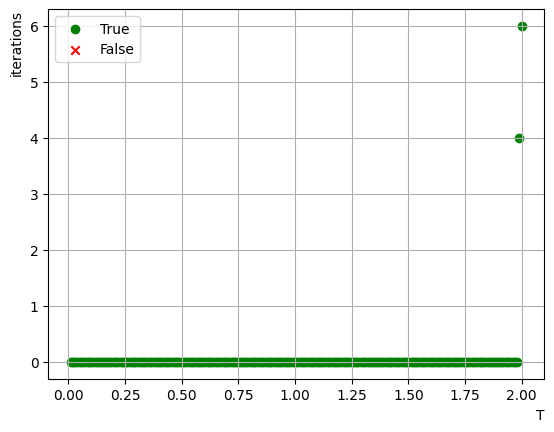

In [330]:
g = 3
res = 10e6
for i in range(300):
    if (x := min_predicts(g, nrestriction=20))[1] < res:
        results = x
print(results[1])

toplot = results[0]
true  = [(x, y) for x, y, p in toplot if p == 3**g]
false = [(x, y) for x, y, p in toplot if p != 3**g]


plt.scatter([x for x, _ in true], [y for _, y in true], color="green")
plt.scatter([x for x, _ in false], [y for _, y in false], marker="x", color="red")
plt.grid("both")
plt.legend(["True", "False"])
plt.xlabel("T", loc="right")
plt.ylabel("iterations", loc="top")
plt.show()